# Probability Distributions

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

- **probability distributions**: a mathematical function we use to represent a real-world process where the outcome is a *random variable*
- **random variable** a variable who's value is unknown
- Most distributions have **parameters** that define their shape

4 distributions covered in this lesson:

- uniform: all values are equally likely
- binomial
- normal
- poisson

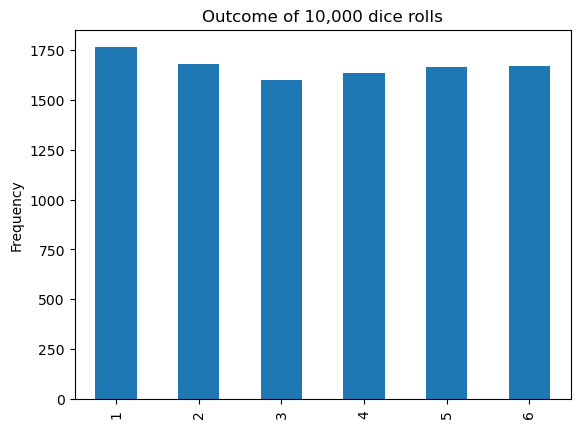

In [17]:
pd.Series(stats.randint(1, 7).rvs(10000)).value_counts().sort_index().plot.bar()
plt.title('Outcome of 10,000 dice rolls')
plt.ylabel('Frequency')
plt.show()

**Given a value, what's the probability?**

In [29]:
(stats.randint(1, 7).rvs(10000) == 3).mean()

0.1701

In [30]:
stats.randint(1, 7).pmf(3)

0.16666666666666666

What's the likelihood we roll less than or equal to 3?

In [37]:
(stats.randint(1, 7).rvs(10000) <= 3).mean()

0.511

In [38]:
stats.randint(1, 7).cdf(3)

0.5

What's the likelihood we roll greater than a 4?

In [39]:
stats.randint(1, 7).sf(4)

0.33333333333333337

**Given a probability, what's the value?**

There's a 50% chance we roll less than or equal to what number?

In [40]:
stats.randint(1, 7).ppf(.5)

3.0

There's a 1 / 6 chance we roll higher than what number?

In [41]:
stats.randint(1, 7).isf(1/6)

5.0

What's the likelihood we roll less than a 5?

less than or equal to 4 == less than 5

In [42]:
stats.randint(1, 7).cdf(4)

0.6666666666666666

## Distributions

- uniform
- binomial: number of sucesses after n trials
    - "success": however we define
    - n: number of trials
    - p: P(success)
    - outcome is 0 or a postive integer number
- normal: continuous outcome, "bell curve"
    - values closer to the midpoint are more likely
    - values further away are less likely
    - mean: the midpoint
    - standard deviation: how "spread out"
- poisson
    - a number of events over some specified time interval
    - lambda, or k: average rate over time

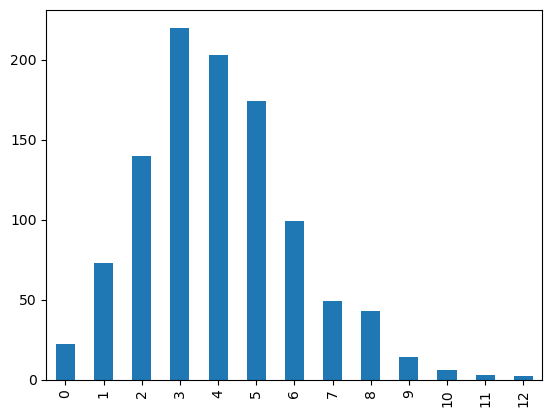

In [44]:
pd.Series(stats.poisson(4).rvs(1000)).value_counts().sort_index().plot.bar()
plt.show()

> We know that the average number of messages in the zoom chat during a lecture is 25. During the probability distributions lecture, we observe that 29 chat        messages were sent. How likely is it that we observed 29 chat messages? 29 or fewer? How likely is it we observed 29 or more chat messages?

In [45]:
avg_messages_per_lecture = 25

stats.poisson(avg_messages_per_lecture).pmf(29)

0.054495342156142663

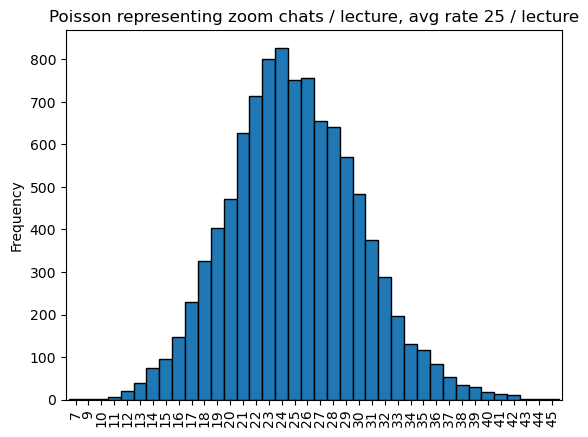

In [55]:
pd.Series(stats.poisson(avg_messages_per_lecture).rvs(10_000)).value_counts().sort_index().plot.bar(width=1, ec='black')
plt.title('Poisson representing zoom chats / lecture, avg rate 25 / lecture')
plt.ylabel('Frequency')
plt.show()

In [53]:
# P(29 or fewer messages)
stats.poisson(avg_messages_per_lecture).cdf(29)

0.8178960840225449

In [54]:
# P(29 or more messages)
# P(29 or more messages) == P(more than 28 messages)
stats.poisson(avg_messages_per_lecture).sf(28)

0.23659925813359786

Suppose the average temperature in February is 70 deg +- 2.7 degrees farenheight. How high would the temperature have to be for us to be in the hottest 10% of all days in Feb?

In [56]:
stats.norm(70, 2.7).isf(.1)

73.46018922697043

What would the temperature have to be for us to be in the lowest 25% of days?

In [57]:
stats.norm(70, 2.7).ppf(.25)

68.17887767447058

How likely is it that the temperature breaks 80?

In [59]:
stats.norm(70, 2.7).sf(80)

0.00010623720744981464

Suppose our marketing department started a new email campaign. We know that for all time, for all email campaigns, we've sent 10,412 emails, and 2,598 have been opened. For this campaign, 160 of 668 emails were opened. How likely is this given our historical open rate?

In [61]:
p_email_is_opened = 2598 / 10412
n_trials = 668

stats.binom(n_trials, p_email_is_opened).cdf(160)

0.2921072896870644

In [62]:
stats.binom(n_trials, p_email_is_opened).sf(160)

0.7078927103129522

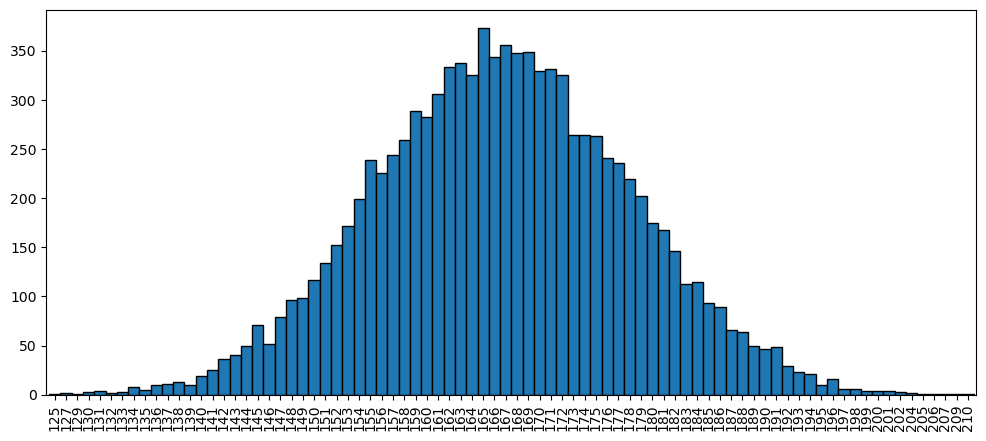

In [69]:
ax = pd.Series(stats.binom(n_trials, p_email_is_opened).rvs(10_000)).value_counts().sort_index().plot.bar(figsize=(12, 5), width=1, ec='black')
plt.show()